**Name:** Urvashi Dube

**Dataset:** https://www.kaggle.com/datasets/parisrohan/credit-score-classification?select=train.csv

# Collect The Data

In [460]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.impute import KNNImputer
import scipy.stats as stats
from sklearn import metrics
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report , accuracy_score , recall_score
from sklearn.model_selection import GridSearchCV

# Importing the Data

In [461]:
train_df = pd.read_csv("train.csv",sep=",",encoding="utf-8", nrows = 20000) # importing the data
test_df = pd.read_csv("test.csv",sep=",",encoding="utf-8", nrows = 10000) 
# less rows are imported due to hardware complexity

In [462]:
train_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good


In [463]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.298434


# Preprocessing the data

In [464]:
train_df.shape

(20000, 28)

In [465]:
train_df.info() # 28 columns, some columns have null values need to be handled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        20000 non-null  object 
 1   Customer_ID               20000 non-null  object 
 2   Month                     20000 non-null  object 
 3   Name                      18011 non-null  object 
 4   Age                       20000 non-null  object 
 5   SSN                       20000 non-null  object 
 6   Occupation                20000 non-null  object 
 7   Annual_Income             20000 non-null  object 
 8   Monthly_Inhand_Salary     17014 non-null  float64
 9   Num_Bank_Accounts         20000 non-null  int64  
 10  Num_Credit_Card           20000 non-null  int64  
 11  Interest_Rate             20000 non-null  int64  
 12  Num_of_Loan               20000 non-null  object 
 13  Type_of_Loan              17784 non-null  object 
 14  Delay_

In [466]:
train_df.describe() # description of numerical columns

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,17014.000000,20000.000000,20000.000000,20000.00000,20000.000000,19599.000000,20000.000000,20000.000000
mean,4285.489059,17.262100,23.839750,69.03265,21.076800,25.798459,32.285886,1381.235099
std,3230.466832,118.259213,134.233455,452.67937,14.662505,182.037921,5.147183,8181.053950
min,355.208333,0.000000,0.000000,1.00000,-5.000000,0.000000,20.000000,0.000000
25%,1653.246458,3.000000,4.000000,7.00000,10.000000,3.000000,27.990958,30.024233
50%,3174.037500,6.000000,6.000000,13.00000,18.000000,5.000000,32.317460,69.685459
75%,6089.731592,8.000000,7.000000,20.00000,28.000000,9.000000,36.528059,168.131731
max,14866.446667,1789.000000,1498.000000,5747.00000,67.000000,2594.000000,50.000000,82256.000000


In [467]:
train_df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [468]:
train_df.isnull().sum()

ID                             0
Customer_ID                    0
Month                          0
Name                        1989
Age                            0
SSN                            0
Occupation                     0
Annual_Income                  0
Monthly_Inhand_Salary       2986
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                2216
Delay_from_due_date            0
Num_of_Delayed_Payment      1410
Changed_Credit_Limit           0
Num_Credit_Inquiries         401
Credit_Mix                     0
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Credit_History_Age          1838
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      881
Payment_Behaviour              0
Monthly_Balance              255
Credit_Score                   0
dtype: int64

In [469]:
train_df = train_df.drop(columns=["ID","Name","SSN"],axis=1) # Dropping unecessary columns

In [470]:
train_df["Credit_Mix"].value_counts()

Credit_Mix
Standard    7180
Good        5003
_           4007
Bad         3810
Name: count, dtype: int64

In [471]:
train_df['Credit_Mix'] = train_df['Credit_Mix'].replace('_',np.nan)

In [472]:
train_df["Credit_Mix"].value_counts()

Credit_Mix
Standard    7180
Good        5003
Bad         3810
Name: count, dtype: int64

In [473]:
train_df["Changed_Credit_Limit"].value_counts()

Changed_Credit_Limit
_                      408
10.06                   40
11.63                   40
8.69                    39
11.04                   39
                      ... 
-0.4699999999999998      1
-3.93                    1
28.15                    1
29.41                    1
33.239999999999995       1
Name: count, Length: 2790, dtype: int64

In [474]:
train_df["Monthly_Balance"].value_counts()

Monthly_Balance
312.49408867943663    1
304.75286500212155    1
292.079559890874      1
212.3936282879463     1
265.26653999779523    1
                     ..
513.3039126522538     1
490.95788013743174    1
483.18891086710113    1
455.2787300995861     1
294.55613895138544    1
Name: count, Length: 19745, dtype: int64

In [475]:
train_df["Payment_Behaviour"].value_counts()

# Remove rows with the value "!@9#%8"
train_df = train_df[train_df["Payment_Behaviour"] != "!@9#%8"]

In [476]:
train_df["Age"].value_counts()

Age
36      586
42      557
34      552
43      534
31      531
       ... 
6765      1
919       1
7699      1
6586      1
1420      1
Name: count, Length: 440, dtype: int64

In [477]:
train_df["Num_of_Loan"]

0        4
1        4
2        4
3        4
4        4
        ..
19995    1
19996    1
19997    1
19998    1
19999    1
Name: Num_of_Loan, Length: 18545, dtype: object

In [478]:
train_df["Num_of_Loan"].value_counts()

Num_of_Loan
3       2774
2       2769
4       2693
0       1871
1       1713
        ... 
501        1
1019       1
92_        1
640        1
359        1
Name: count, Length: 96, dtype: int64

In [479]:
train_df["Occupation"].value_counts()

Occupation
_______          1292
Mechanic         1286
Lawyer           1235
Doctor           1197
Journalist       1192
Developer        1188
Media_Manager    1170
Teacher          1159
Entrepreneur     1154
Musician         1140
Architect        1126
Writer           1118
Scientist        1112
Engineer         1096
Manager          1093
Accountant        987
Name: count, dtype: int64

In [480]:
train_df["Num_of_Delayed_Payment"].value_counts()

Num_of_Delayed_Payment
16      1021
20       988
17       982
15       943
19       935
        ... 
1552       1
2503       1
929        1
182        1
3870       1
Name: count, Length: 184, dtype: int64

In [481]:
train_df["Payment_of_Min_Amount"].value_counts()

Payment_of_Min_Amount
Yes    9677
No     6633
NM     2235
Name: count, dtype: int64

In [482]:
train_df["Credit_History_Age"].value_counts()

Credit_History_Age
18 Years and 9 Months    93
17 Years and 9 Months    92
17 Years and 3 Months    91
18 Years and 4 Months    91
19 Years and 4 Months    90
                         ..
3 Years and 9 Months      4
0 Years and 2 Months      3
0 Years and 1 Months      2
33 Years and 7 Months     2
33 Years and 8 Months     1
Name: count, Length: 404, dtype: int64

In [483]:
train_df["Customer_ID"].value_counts()

Customer_ID
CUS_0xf3e     8
CUS_0xacf1    8
CUS_0x6142    8
CUS_0x3a1b    8
CUS_0x414d    8
             ..
CUS_0x1c40    5
CUS_0xb92b    5
CUS_0x7ccf    4
CUS_0x943c    4
CUS_0xa8e7    4
Name: count, Length: 2500, dtype: int64

In [484]:
train_df["Month"].value_counts()

Month
February    2332
January     2331
July        2327
March       2321
May         2314
June        2312
August      2311
April       2297
Name: count, dtype: int64

In [485]:
train_df["Monthly_Inhand_Salary"].value_counts()

Monthly_Inhand_Salary
3080.555000     14
4387.272500     12
12352.546667     8
4526.385000      8
601.444583       8
                ..
1426.240000      1
2319.831269      1
5053.718541      1
2326.905191      1
2346.678333      1
Name: count, Length: 2629, dtype: int64

In [486]:
train_df["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
8       2578
6       2564
7       2332
5       2211
3       2169
        ... 
212        1
1019       1
1222       1
610        1
1418       1
Name: count, Length: 234, dtype: int64

In [487]:
train_df["Num_Credit_Card"].value_counts()

Num_Credit_Card
5      3415
6      3228
7      3094
3      2503
4      2456
       ... 
550       1
43        1
749       1
136       1
294       1
Name: count, Length: 396, dtype: int64

In [488]:
train_df["Interest_Rate"].value_counts()

Interest_Rate
5       997
8       931
12      870
6       861
20      828
       ... 
4464      1
284       1
369       1
2779      1
1176      1
Name: count, Length: 386, dtype: int64

In [489]:
train_df["Delay_from_due_date"].value_counts()

Delay_from_due_date
 14    667
 13    640
 10    622
 8     619
 9     598
      ... 
 63      8
-5       6
-4       6
 67      4
 66      4
Name: count, Length: 73, dtype: int64

In [490]:
train_df["Num_Credit_Inquiries"].value_counts()

Num_Credit_Inquiries
4.0       2020
3.0       1695
2.0       1550
6.0       1479
1.0       1434
          ... 
1078.0       1
528.0        1
399.0        1
2131.0       1
2304.0       1
Name: count, Length: 302, dtype: int64

In [491]:
train_df["Credit_Utilization_Ratio"].value_counts()

Credit_Utilization_Ratio
26.822620    1
26.563983    1
30.862544    1
36.589497    1
35.981002    1
            ..
27.676465    1
34.894273    1
29.972129    1
29.436081    1
34.473359    1
Name: count, Length: 18545, dtype: int64

In [492]:
train_df["Total_EMI_per_month"].value_counts()

Total_EMI_per_month
0.000000        1914
61.362858          8
268.551483         8
102.784937         8
19.660740          8
                ... 
776.847256         1
15768.000000       1
73525.000000       1
57857.000000       1
66023.000000       1
Name: count, Length: 2939, dtype: int64

In [493]:
train_df["Amount_invested_monthly"].value_counts()

Amount_invested_monthly
__10000__             804
0.0                    31
235.66620413587535      1
201.38763962260924      1
147.3636133000654       1
                     ... 
101.91748344232306      1
13.020702121698895      1
101.26285539407726      1
304.38934978108006      1
60.079978023314005      1
Name: count, Length: 16909, dtype: int64

In [494]:
train_df[train_df["Num_Bank_Accounts"]<0]["Num_Bank_Accounts"].value_counts()

Series([], Name: count, dtype: int64)

In [495]:
train_df[train_df["Num_Bank_Accounts"]> 300]["Num_Bank_Accounts"].value_counts()

Num_Bank_Accounts
1332    3
1414    2
1257    2
572     2
1295    2
       ..
1201    1
1487    1
1019    1
1222    1
1418    1
Name: count, Length: 200, dtype: int64

In [496]:
# Printing Values in the processed data
for i in train_df.columns:
    print(i,end=': ')
    print('\n',train_df[i].unique())
    print()

Customer_ID: 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x3a26' 'CUS_0x3d71'
 'CUS_0xf3e']

Month: 
 ['January' 'February' 'March' 'April' 'May' 'July' 'August' 'June']

Age: 
 ['23' '-500' '28_' '28' '34' '54' '55' '21' '31' '33' '7580' '30' '30_'
 '24' '24_' '44' '45' '40' '41' '32' '33_' '35' '35_' '36' '39' '37' '181'
 '20' '46' '26' '42' '19' '31_' '48' '995' '40_' '38' '54_' '5079' '43'
 '21_' '22' '37_' '16' '7080' '18' '849' '3885' '20_' '15' '27' '43_'
 '38_' '25' '3052' '14' '5342' '17' '18_' '4431' '2657' '2111_' '46_' '47'
 '1032' '16_' '19_' '456' '5717' '53' '53_' '56' '25_' '27_' '55_' '3169'
 '1191' '29' '34_' '42_' '7140' '48_' '49' '49_' '8233' '6955' '2534'
 '3115' '7657' '51' '50' '5112' '32_' '6452' '22_' '17_' '1439' '29_'
 '5795' '4872' '1772' '15_' '1383' '5657' '52' '1934' '51_' '3734' '26_'
 '2056' '50_' '39_' '7508' '2339' '14_' '8406' '36_' '6953' '5626' '4471'
 '548' '44_' '769' '5490' '4202' '3665' '7670_' '4670' '3616' '6922'
 '1808' '7992' '45_' '

In [497]:
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].replace('_',np.nan)
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].astype("float")
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].fillna(train_df["Changed_Credit_Limit"].mean())
train_df['Changed_Credit_Limit'] = train_df['Changed_Credit_Limit'].round(3)

In [498]:
train_df['Monthly_Balance']=train_df['Monthly_Balance'].replace('__-333333333333333333333333333__',np.nan)
train_df['Monthly_Balance'] = train_df['Monthly_Balance'].astype("float")
train_df['Monthly_Balance'] = train_df['Monthly_Balance'].fillna(train_df["Monthly_Balance"].mean())
train_df['Monthly_Balance'] = train_df['Monthly_Balance'].round(3)

In [499]:
train_df["Payment_Behaviour"].head()

0     High_spent_Small_value_payments
1      Low_spent_Large_value_payments
2     Low_spent_Medium_value_payments
3      Low_spent_Small_value_payments
4    High_spent_Medium_value_payments
Name: Payment_Behaviour, dtype: object

In [500]:
from sklearn.preprocessing import LabelEncoder

custom_mapping = {
    "Low_spent_Small_value_payments": 1,
    "Low_spent_Medium_value_payments": 2,
    "Low_spent_Large_value_payments": 3,
    "High_spent_Small_value_payments": 4,
    "High_spent_Medium_value_payments": 5,
    "High_spent_Large_value_payments": 6
}

le = LabelEncoder()
le.fit(train_df["Payment_Behaviour"]) 
train_df["Payment_Behaviour"] = train_df["Payment_Behaviour"].map(custom_mapping)

In [501]:
train_df["Payment_Behaviour"].head()

0    4
1    3
2    2
3    1
4    5
Name: Payment_Behaviour, dtype: int64

In [502]:
train_df["Payment_Behaviour"].ffill(inplace=True)
train_df["Payment_Behaviour"]=train_df["Payment_Behaviour"].astype("int64")

In [503]:
def filtercolumns(value):
    if isinstance(value, str):
        if '-' in value:
            return value.split('-')[1]
        elif '_' in value:
            return value.split('_')[0]
        else:
            return value
    else:
        return value

In [504]:
train_df["Age"] = train_df["Age"].apply(filtercolumns)
train_df["Age"] = train_df["Age"].astype(float) 
train_df["Age"].fillna(-1, inplace=True)  
train_df["Age"] = train_df["Age"].astype(int)  

In [505]:
train_df["Annual_Income"] = train_df["Annual_Income"].apply(filtercolumns)
train_df["Annual_Income"] = train_df["Annual_Income"].astype(float)

In [506]:
train_df["Num_of_Loan"] = train_df["Num_of_Loan"].apply(filtercolumns)

train_df["Num_of_Loan"]=train_df["Num_of_Loan"].astype(int)

train_df["Num_of_Loan"] = np.where(train_df["Num_of_Loan"] > 100, np.nan, train_df["Num_of_Loan"])

In [507]:
train_df["Outstanding_Debt"] = train_df["Outstanding_Debt"].apply(filtercolumns)
train_df["Outstanding_Debt"] = train_df["Outstanding_Debt"].astype(float)

In [508]:
train_df["Occupation"]=train_df["Occupation"].replace("_______",np.nan)

train_df["Occupation"]=train_df["Occupation"].astype("object")

In [509]:
def filter_Num_of_Delayed_Payment(value:str):
    if '_' in str(value):
        return value.split('_')[0]
    else:
        return value

train_df["Num_of_Delayed_Payment"]= train_df["Num_of_Delayed_Payment"].apply(filter_Num_of_Delayed_Payment)

train_df["Num_of_Delayed_Payment"]= train_df["Num_of_Delayed_Payment"].astype("Int64")

In [510]:
years  = []
months = []

for value in train_df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)

train_df['Credit_Age_years'] = pd.Series(years)
train_df['Credit_Age_months'] = pd.Series(months) 
train_df.drop('Credit_History_Age',axis=1,inplace=True)

In [511]:
custom_mapping_month = {"January":1,"February":2,"March":3,"April":4,"May":5,"June":6,"July":7,"August":8}

le1 = LabelEncoder()
le1.fit(train_df["Month"]) 
train_df["Month"] = train_df["Month"].map(custom_mapping_month)

In [512]:
train_df["Num_Bank_Accounts"]=train_df["Num_Bank_Accounts"].replace(-1,0)

train_df["Num_Bank_Accounts"]=train_df["Num_Bank_Accounts"].round().astype('Int64')

In [513]:
train_df["Type_of_Loan"]=train_df["Type_of_Loan"].astype("object")

train_df.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                  1292
Annual_Income                  0
Monthly_Inhand_Salary       2763
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                   70
Type_of_Loan                2048
Delay_from_due_date            0
Num_of_Delayed_Payment      1294
Changed_Credit_Limit           0
Num_Credit_Inquiries         364
Credit_Mix                  3728
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      803
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_Age_years            2916
Credit_Age_months           2916
dtype: int64

In [514]:
train_df["Type_of_Loan"] = train_df["Type_of_Loan"].fillna(train_df["Type_of_Loan"].ffill())

train_df.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                  1292
Annual_Income                  0
Monthly_Inhand_Salary       2763
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                   70
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment      1294
Changed_Credit_Limit           0
Num_Credit_Inquiries         364
Credit_Mix                  3728
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly      803
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_Age_years            2916
Credit_Age_months           2916
dtype: int64

In [515]:
(train_df["Delay_from_due_date"]<0).sum()

106

In [516]:
train_df["Delay_from_due_date"] = train_df["Delay_from_due_date"].clip(lower=0)

In [517]:
train_df["Credit_Utilization_Ratio"]=train_df["Credit_Utilization_Ratio"].round(3)

In [518]:
train_df["Total_EMI_per_month"]=train_df["Total_EMI_per_month"].astype("float")
train_df["Total_EMI_per_month"]=train_df["Total_EMI_per_month"].round(3)

In [519]:
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].replace("__10000__",np.nan)
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].astype("float")
train_df["Amount_invested_monthly"]=train_df["Amount_invested_monthly"].round(3)

In [520]:
train_df["Monthly_Inhand_Salary"]=train_df["Monthly_Inhand_Salary"].round(3)

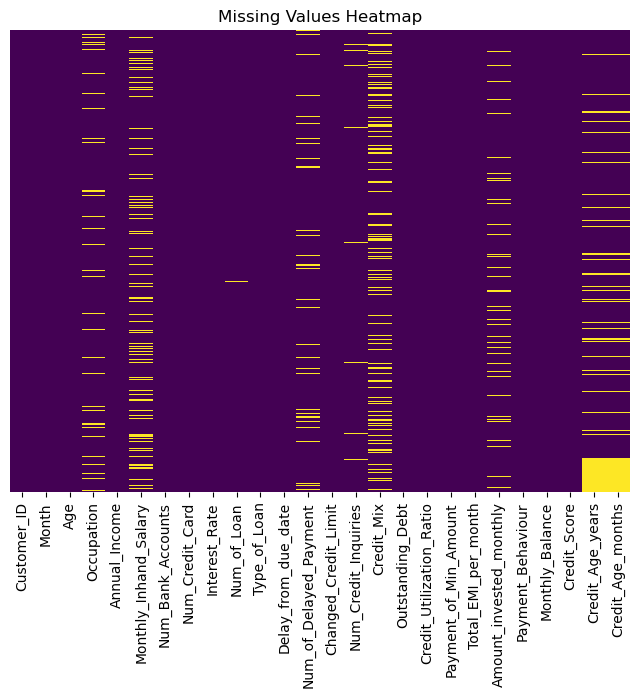

In [521]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show() # Still many null values have to be imputed

In [522]:
train_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1,23,Scientist,19114.12,1824.843,3,4,3,4.0,...,809.98,26.823,No,49.575,80.415,4,312.494,Good,22.0,1.0
1,CUS_0xd40,2,23,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,31.945,No,49.575,118.280,3,284.629,Good,NaN,NaN
2,CUS_0xd40,3,500,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,28.609,No,49.575,81.700,2,331.210,Good,22.0,3.0
3,CUS_0xd40,4,23,Scientist,19114.12,NaN,3,4,3,4.0,...,809.98,31.378,No,49.575,199.458,1,223.451,Good,22.0,4.0
4,CUS_0xd40,5,23,Scientist,19114.12,1824.843,3,4,3,4.0,...,809.98,24.797,No,49.575,41.420,5,341.489,Good,22.0,5.0


In [523]:
numerical_data = []
object_data = []

for column in train_df.columns:
    if train_df.dtypes[column] != 'object':
        numerical_data.append(column)
    else:
        object_data.append(column)

In [524]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)

train_df[numerical_data] = imputer.fit_transform(train_df[numerical_data])
train_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,26.823,No,49.575,80.415,4.0,312.494,Good,22.0,1.0
1,CUS_0xd40,2.0,23.0,Scientist,19114.12,1758.4526,3.0,4.0,3.0,4.0,...,809.98,31.945,No,49.575,118.280,3.0,284.629,Good,22.0,4.8
2,CUS_0xd40,3.0,500.0,Scientist,19114.12,1692.0622,3.0,4.0,3.0,4.0,...,809.98,28.609,No,49.575,81.700,2.0,331.210,Good,22.0,3.0
3,CUS_0xd40,4.0,23.0,Scientist,19114.12,1625.6718,3.0,4.0,3.0,4.0,...,809.98,31.378,No,49.575,199.458,1.0,223.451,Good,22.0,4.0
4,CUS_0xd40,5.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,24.797,No,49.575,41.420,5.0,341.489,Good,22.0,5.0


In [525]:
train_df.isnull().sum()

Customer_ID                    0
Month                          0
Age                            0
Occupation                  1292
Annual_Income                  0
Monthly_Inhand_Salary          0
Num_Bank_Accounts              0
Num_Credit_Card                0
Interest_Rate                  0
Num_of_Loan                    0
Type_of_Loan                   0
Delay_from_due_date            0
Num_of_Delayed_Payment         0
Changed_Credit_Limit           0
Num_Credit_Inquiries           0
Credit_Mix                  3728
Outstanding_Debt               0
Credit_Utilization_Ratio       0
Payment_of_Min_Amount          0
Total_EMI_per_month            0
Amount_invested_monthly        0
Payment_Behaviour              0
Monthly_Balance                0
Credit_Score                   0
Credit_Age_years               0
Credit_Age_months              0
dtype: int64

In [526]:
train_df['Occupation'].ffill(inplace=True)

In [527]:
custom_mapping_credit = {"Standard":1,"Bad":2,"Good":3}

le2 = LabelEncoder()
le2.fit(train_df["Credit_Mix"]) 
train_df["Credit_Mix"] = train_df["Credit_Mix"].map(custom_mapping_credit)

In [528]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0)
credit_mix_data = train_df['Credit_Mix'].values.reshape(-1, 1)
train_df['Credit_Mix'] = imputer.fit_transform(credit_mix_data)

In [529]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.298434


In [530]:
test_df.shape

(10000, 27)

In [531]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        10000 non-null  object 
 1   Customer_ID               10000 non-null  object 
 2   Month                     10000 non-null  object 
 3   Name                      8976 non-null   object 
 4   Age                       10000 non-null  object 
 5   SSN                       10000 non-null  object 
 6   Occupation                10000 non-null  object 
 7   Annual_Income             10000 non-null  object 
 8   Monthly_Inhand_Salary     8505 non-null   float64
 9   Num_Bank_Accounts         10000 non-null  int64  
 10  Num_Credit_Card           10000 non-null  int64  
 11  Interest_Rate             10000 non-null  int64  
 12  Num_of_Loan               10000 non-null  object 
 13  Type_of_Loan              8892 non-null   object 
 14  Delay_f

In [532]:
test_df.describe() # description of numerical columns

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month,Monthly_Balance
count,8505.000000,10000.000000,10000.000000,10000.000000,10000.000000,9794.000000,10000.000000,10000.000000,9883.000000
mean,4286.384483,15.576200,24.121000,65.104900,21.014500,31.002144,32.324144,1516.036272,406.247070
std,3233.509597,106.677882,134.891223,429.824932,14.653606,199.397920,5.103041,8672.473524,215.987914
min,355.208333,0.000000,0.000000,1.000000,-5.000000,0.000000,20.509652,0.000000,0.103402
25%,1647.255786,3.000000,4.000000,7.000000,10.000000,4.000000,28.148427,31.155358,271.910304
50%,3177.560000,6.000000,6.000000,13.000000,18.000000,7.000000,32.350970,75.755156,338.075099
75%,6094.433333,8.000000,7.000000,20.000000,28.000000,10.000000,36.451368,183.413029,474.620208
max,14866.446667,1709.000000,1499.000000,5799.000000,66.000000,2593.000000,48.540663,82347.000000,1566.125572


# Exploratory Data Analysis

In [533]:
train_df.isnull().sum()

Customer_ID                 0
Month                       0
Age                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
Credit_Age_years            0
Credit_Age_months           0
dtype: int64

In [534]:
# Printing Values in the processed data
for i in train_df.columns:
    print(i,end=': ')
    print('\n',train_df[i].unique())
    print()

Customer_ID: 
 ['CUS_0xd40' 'CUS_0x21b1' 'CUS_0x2dbc' ... 'CUS_0x3a26' 'CUS_0x3d71'
 'CUS_0xf3e']

Month: 
 [1. 2. 3. 4. 5. 7. 8. 6.]

Age: 
 [  23.  500.   28.   34.   54.   55.   21.   31.   33. 7580.   30.   24.
   44.   45.   40.   41.   32.   35.   36.   39.   37.  181.   20.   46.
   26.   42.   19.   48.  995.   38. 5079.   43.   22.   16. 7080.   18.
  849. 3885.   15.   27.   25. 3052.   14. 5342.   17. 4431. 2657. 2111.
   47. 1032.  456. 5717.   53.   56. 3169. 1191.   29. 7140.   49. 8233.
 6955. 2534. 3115. 7657.   51.   50. 5112. 6452. 1439. 5795. 4872. 1772.
 1383. 5657.   52. 1934. 3734. 2056. 7508. 2339. 8406. 6953. 5626. 4471.
  548.  769. 5490. 4202. 3665. 7670. 4670. 3616. 6922. 1808. 7992.  223.
 1232. 4659.  395. 7099. 6048. 3936. 3512.  123. 4049. 5053. 2109. 7183.
 5604. 1206. 6835. 4067. 1812. 1170. 3625. 6354. 3724.  480. 5610. 4710.
 4351. 5784. 3937. 3542. 2239. 5645. 7425. 7851. 2027. 6306.  835. 3513.
 6846. 6868.  831. 8394. 2751.  733.  783. 2455. 5612. 

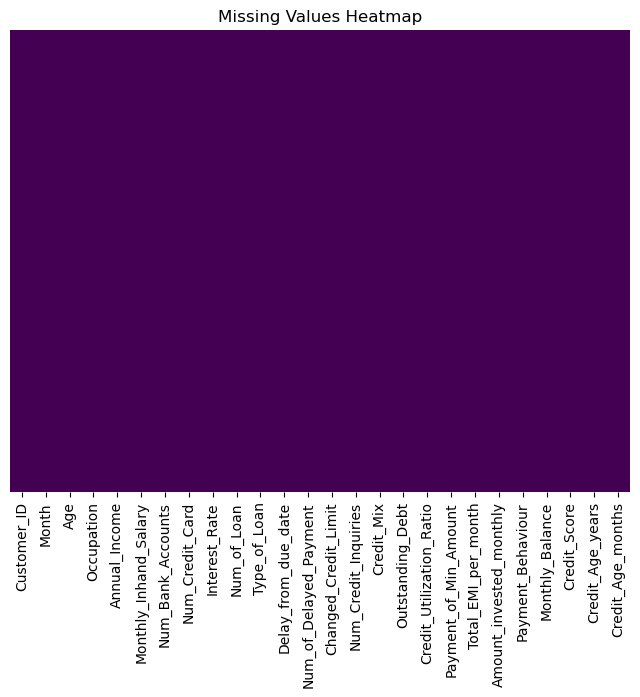

In [535]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show() 

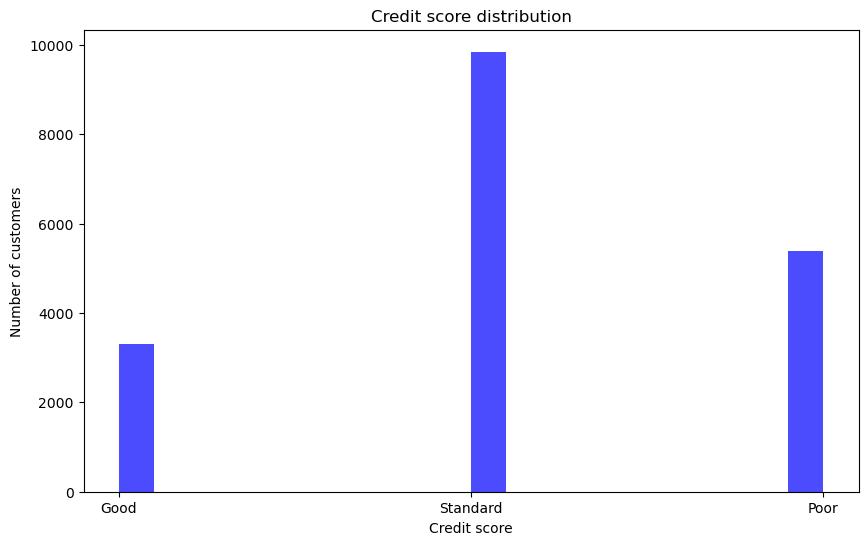

In [536]:
plt.figure(figsize=(10, 6))
plt.hist(train_df['Credit_Score'], bins=20, color='blue', alpha=0.7)
plt.title('Credit score distribution')
plt.xlabel('Credit score')
plt.ylabel('Number of customers')
plt.show()

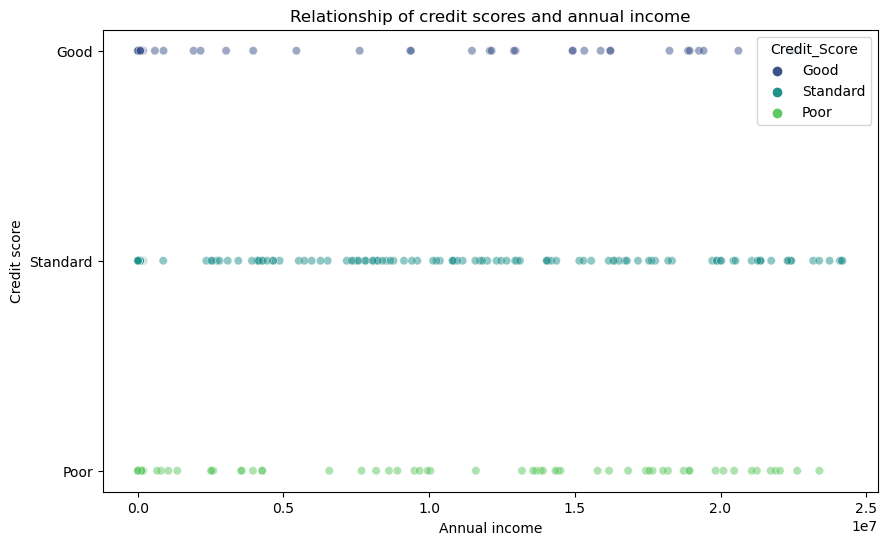

In [537]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['Annual_Income'], y=train_df['Credit_Score'], hue=train_df['Credit_Score'], palette='viridis', alpha=0.5)
plt.title('Relationship of credit scores and annual income')
plt.xlabel('Annual income')
plt.ylabel('Credit score')
plt.show()

In [538]:
train_df["Occupation"]

0         Scientist
1         Scientist
2         Scientist
3         Scientist
4         Scientist
            ...    
19995    Journalist
19996    Journalist
19997    Journalist
19998    Journalist
19999    Journalist
Name: Occupation, Length: 18545, dtype: object

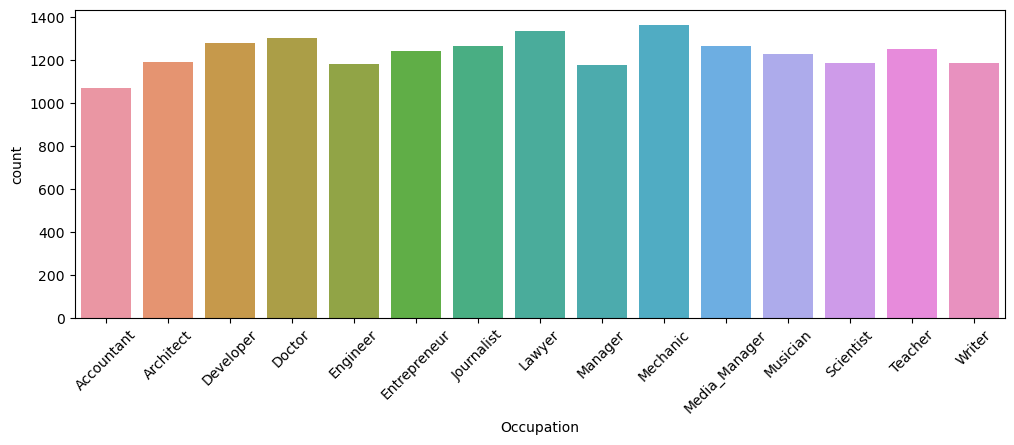

In [539]:
train_df['Occupation'] = train_df['Occupation'].astype('category')
plt.figure(figsize=(12, 4))
sns.countplot(data=train_df, x='Occupation')
plt.xticks(rotation=45)
plt.show()

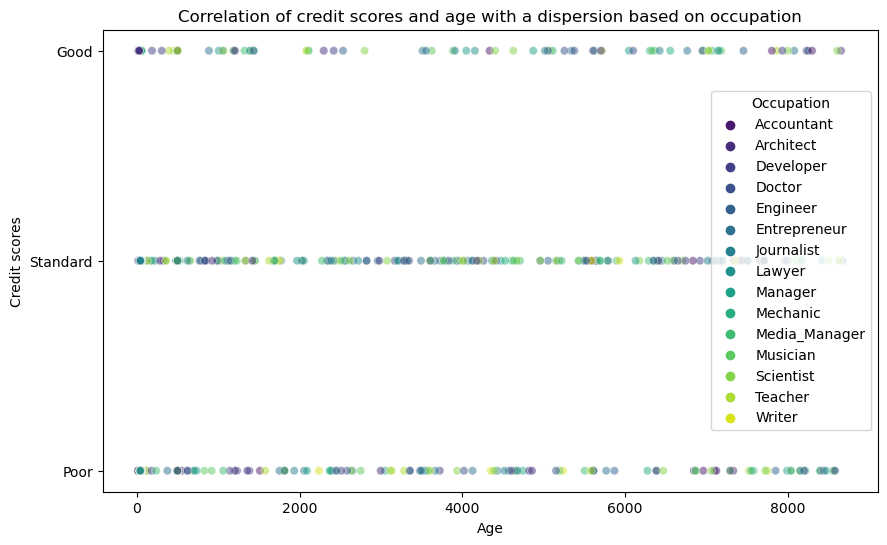

In [540]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=train_df['Age'], y=train_df['Credit_Score'], hue=train_df['Occupation'], palette='viridis', alpha=0.5)
plt.title('Correlation of credit scores and age with a dispersion based on occupation')
plt.xlabel('Age')
plt.ylabel('Credit scores')
plt.show()

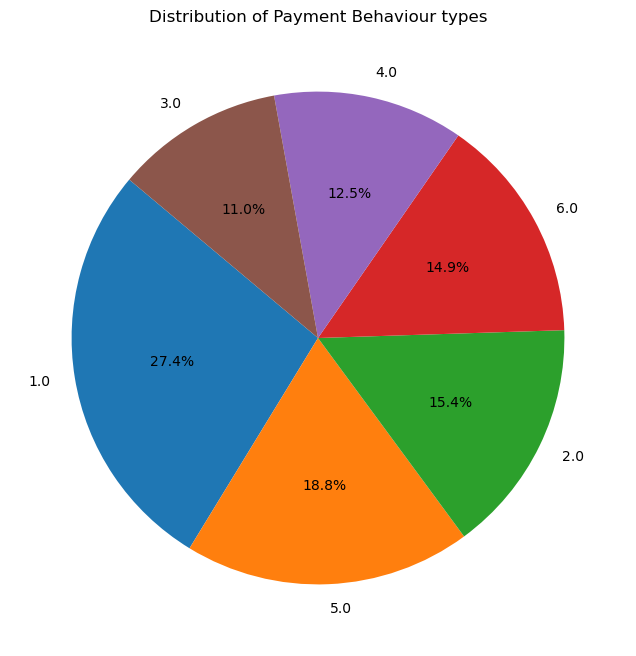

In [541]:
p_counts = train_df['Payment_Behaviour'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(p_counts, labels=p_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Payment Behaviour types')
plt.show()

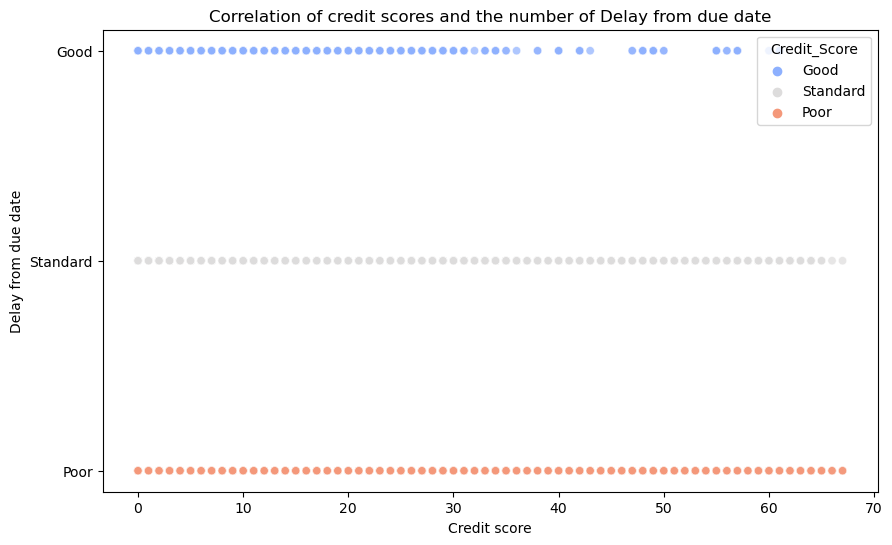

In [542]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, y='Credit_Score', x='Delay_from_due_date', hue='Credit_Score', palette='coolwarm', alpha=0.7)
plt.title('Correlation of credit scores and the number of Delay from due date')
plt.xlabel('Credit score')
plt.ylabel('Delay from due date')
plt.show()

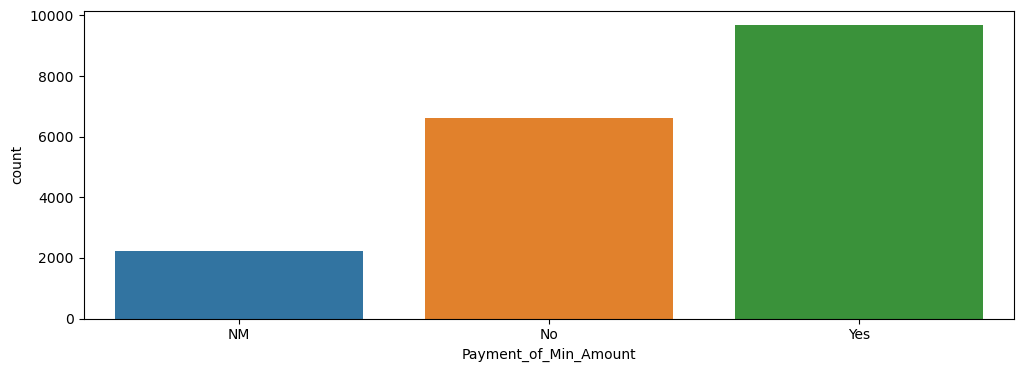

In [543]:
train_df['Payment_of_Min_Amount'] = train_df['Payment_of_Min_Amount'].astype('category')

plt.figure(figsize=(12, 4))
sns.countplot(data=train_df, x='Payment_of_Min_Amount')
plt.show()

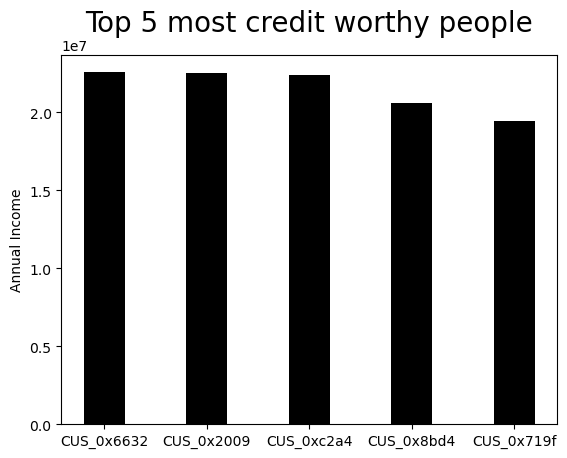

In [544]:
good_credit =train_df[train_df['Credit_Score']=="Good"]
top5=good_credit.sort_values('Annual_Income', ascending = False).head(5)
plt.title('Top 5 most credit worthy people', fontsize = 20)
plt.ylabel('Annual Income')
plt.bar(top5["Customer_ID"], top5.Annual_Income, tick_label = top5.Customer_ID, color = 'black', width = 0.4);

In [545]:
train_df

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,26.823,No,49.575,80.415,4.0,312.494,Good,22.0,1.0
1,CUS_0xd40,2.0,23.0,Scientist,19114.12,1758.4526,3.0,4.0,3.0,4.0,...,809.98,31.945,No,49.575,118.280,3.0,284.629,Good,22.0,4.8
2,CUS_0xd40,3.0,500.0,Scientist,19114.12,1692.0622,3.0,4.0,3.0,4.0,...,809.98,28.609,No,49.575,81.700,2.0,331.210,Good,22.0,3.0
3,CUS_0xd40,4.0,23.0,Scientist,19114.12,1625.6718,3.0,4.0,3.0,4.0,...,809.98,31.378,No,49.575,199.458,1.0,223.451,Good,22.0,4.0
4,CUS_0xd40,5.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,24.797,No,49.575,41.420,5.0,341.489,Good,22.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,CUS_0xf3e,4.0,43.0,Journalist,9846.55,698.5460,5.0,6.0,16.0,1.0,...,550.52,30.861,Yes,5.218,17.729,6.0,286.907,Standard,19.0,4.6
19996,CUS_0xf3e,5.0,43.0,Journalist,9846.55,698.5460,5.0,6.0,16.0,1.0,...,550.52,36.811,Yes,5.218,38.533,1.0,316.103,Standard,18.8,6.2
19997,CUS_0xf3e,6.0,43.0,Journalist,9846.55,698.5460,5.0,6.0,16.0,1.0,...,550.52,28.735,Yes,5.218,25.614,2.0,319.022,Standard,18.8,6.2
19998,CUS_0xf3e,7.0,43.0,Journalist,9846.55,698.5460,5.0,6.0,16.0,1.0,...,550.52,30.811,Yes,5.218,61.786,1.0,292.850,Poor,21.0,7.4


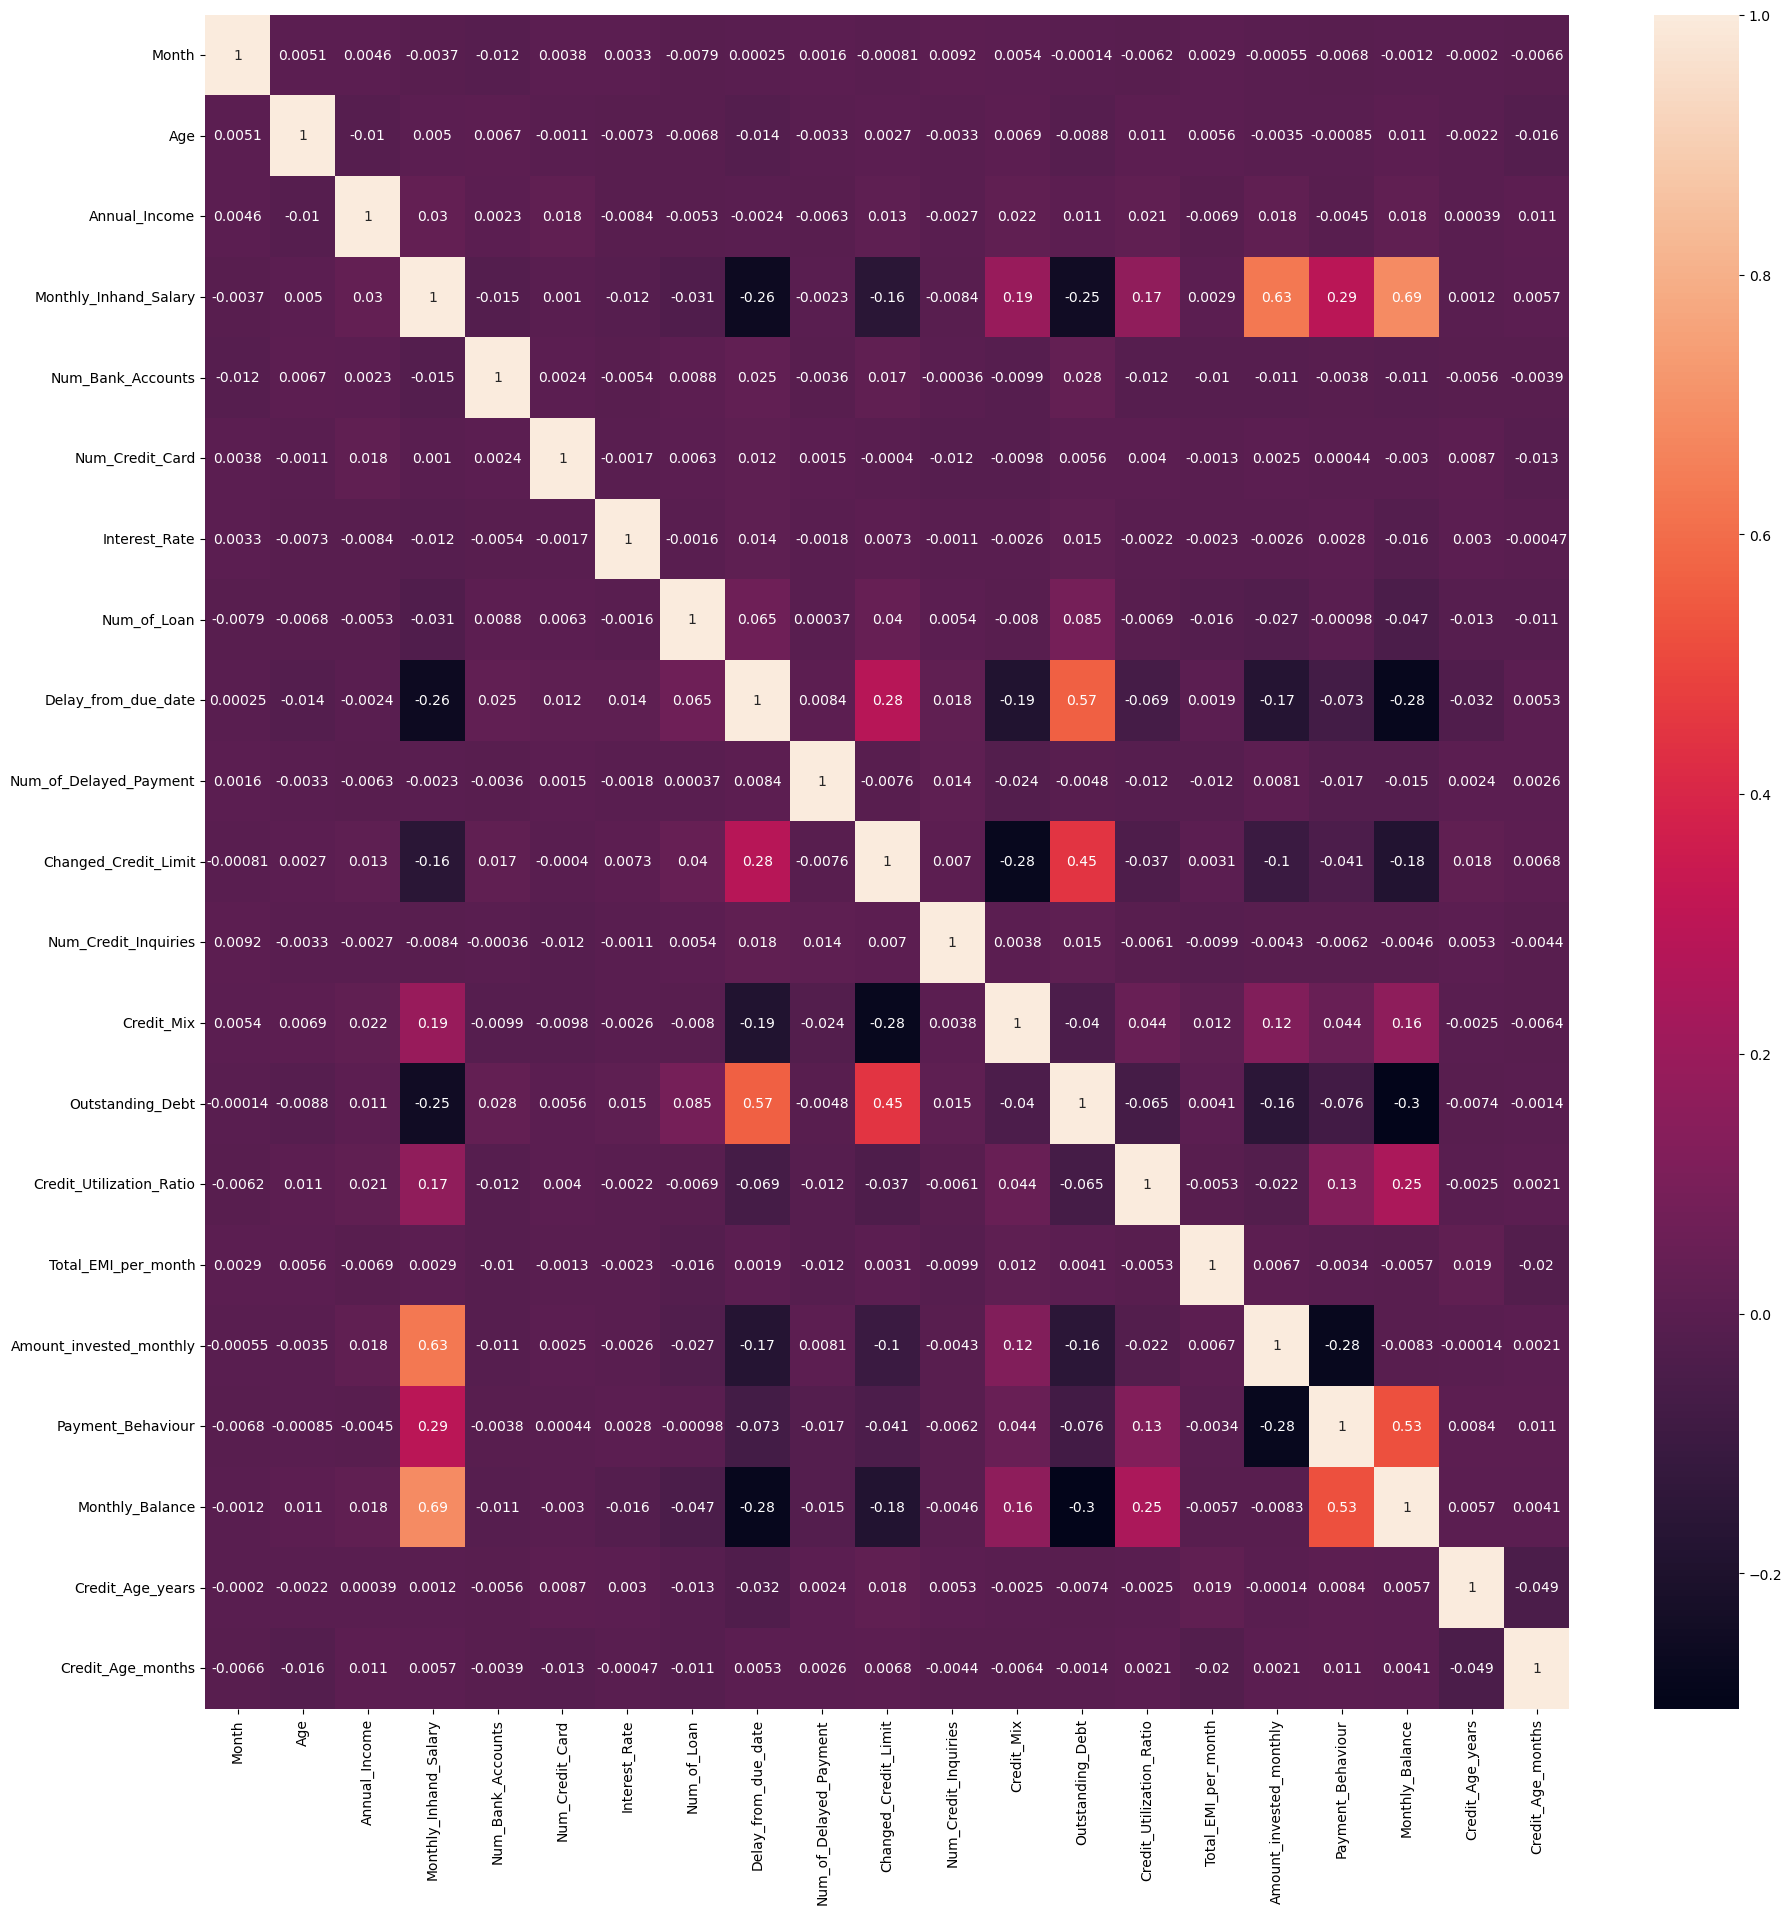

In [546]:
numeric_columns = train_df.select_dtypes(include=['float64', 'int64']).columns

correlation_matrix = train_df[numeric_columns].corr()

plt.figure(figsize=(22, 22))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [550]:
train_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,CUS_0xd40,1.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,26.823,No,49.575,80.415,4.0,312.494,Good,22.0,1.0
1,CUS_0xd40,2.0,23.0,Scientist,19114.12,1758.4526,3.0,4.0,3.0,4.0,...,809.98,31.945,No,49.575,118.280,3.0,284.629,Good,22.0,4.8
2,CUS_0xd40,3.0,500.0,Scientist,19114.12,1692.0622,3.0,4.0,3.0,4.0,...,809.98,28.609,No,49.575,81.700,2.0,331.210,Good,22.0,3.0
3,CUS_0xd40,4.0,23.0,Scientist,19114.12,1625.6718,3.0,4.0,3.0,4.0,...,809.98,31.378,No,49.575,199.458,1.0,223.451,Good,22.0,4.0
4,CUS_0xd40,5.0,23.0,Scientist,19114.12,1824.8430,3.0,4.0,3.0,4.0,...,809.98,24.797,No,49.575,41.420,5.0,341.489,Good,22.0,5.0


In [551]:
train_df = train_df.apply(lambda x: x.astype('category').cat.codes)
train_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
0,2453,0,9,12,584,1226,3,4,2,17,...,907,2319,1,736,4875,3,7405,0,97,1
1,2453,1,9,12,584,1145,3,4,2,17,...,907,5707,1,736,7806,2,5479,0,97,20
2,2453,2,63,12,584,1063,3,4,2,17,...,907,3490,1,736,4982,1,8557,0,97,11
3,2453,3,9,12,584,978,3,4,2,17,...,907,5337,1,736,12056,0,2005,0,97,16
4,2453,4,9,12,584,1226,3,4,2,17,...,907,1061,1,736,1500,4,9165,0,97,21


In [552]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18545 entries, 0 to 19999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Customer_ID               18545 non-null  int16
 1   Month                     18545 non-null  int8 
 2   Age                       18545 non-null  int16
 3   Occupation                18545 non-null  int8 
 4   Annual_Income             18545 non-null  int16
 5   Monthly_Inhand_Salary     18545 non-null  int16
 6   Num_Bank_Accounts         18545 non-null  int16
 7   Num_Credit_Card           18545 non-null  int16
 8   Interest_Rate             18545 non-null  int16
 9   Num_of_Loan               18545 non-null  int8 
 10  Type_of_Loan              18545 non-null  int16
 11  Delay_from_due_date       18545 non-null  int8 
 12  Num_of_Delayed_Payment    18545 non-null  int16
 13  Changed_Credit_Limit      18545 non-null  int16
 14  Num_Credit_Inquiries      18545 non-null  i

In [553]:
# Printing Values in the processed data
for i in train_df.columns:
    print(i,end=': ')
    print('\n',train_df[i].unique())
    print()

Customer_ID: 
 [2453  190  347 ...  504  541 2485]

Month: 
 [0 1 2 3 4 6 7 5]

Age: 
 [  9  63  14  20  40  41   7  17  19 353  16  10  30  31  26  27  18  21
  22  25  23  47   6  32  12  28   5  34  83  24 252  29   8   2 331   4
  78 202   1  13  11 166   0 262   3 229 157 134  33  85  59 286  39  42
 170  95  15 335  35 378 324 150 168 354  37  36 253 309 109 289 246 121
 104 282  38 125 197 130 350 138 382 323 280 230  65  73 266 218 194 355
 240 192 322 122 366  50  99 239  58 332 293 205 184  44 211 250 133 338
 275  97 319 212 123  93 193 302 196  60 277 242 222 288 206 186 135 281
 346 362 127 299  76 185 320 321  75 381 159  72  74 146 279 213 238 372
 106 347 195 139  61  90  70 264 243 209 173  69 278 287 313 356  80 318
 263 151  43 204 251 394 224 162 363 161 303 283 296  79 179 387 360 257
 371 187 270 207 311 156 101 129 330 294 155 120 305 144 128 163 176 268
 260 137 272 247 306 177 357 244 147 255 216 344 339 368 256 153 152 274
 199  94 249 369 261 375 325 188 361 

In [554]:
train_df.describe()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_Age_years,Credit_Age_months
count,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,...,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000,18545.000000
mean,1248.172284,3.495282,23.622378,7.044702,1263.763440,2143.353572,6.886384,10.329954,17.128498,14.162092,...,1242.667188,5913.949582,1.401294,1072.974548,8895.632354,2.245403,8993.398274,1.352440,77.573955,24.017094
std,721.119934,2.293685,32.898839,4.255661,729.922935,1284.181183,15.421818,35.050791,31.637957,9.082158,...,719.183546,3281.876777,0.693771,766.480232,5180.737945,1.844999,5148.966380,0.765001,38.570958,15.457936
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,625.000000,1.000000,11.000000,3.000000,632.000000,1013.000000,3.000000,4.000000,6.000000,9.000000,...,619.000000,3096.000000,1.000000,383.000000,4408.000000,0.000000,4558.000000,1.000000,48.000000,11.000000
50%,1247.000000,3.000000,20.000000,7.000000,1260.000000,2129.000000,6.000000,6.000000,12.000000,13.000000,...,1242.000000,5934.000000,2.000000,1042.000000,8849.000000,2.000000,9026.000000,2.000000,77.000000,24.000000
75%,1872.000000,6.000000,28.000000,11.000000,1895.000000,3259.000000,8.000000,7.000000,19.000000,20.000000,...,1866.000000,8723.000000,2.000000,1714.000000,13372.000000,4.000000,13366.000000,2.000000,107.000000,36.000000
max,2499.000000,7.000000,396.000000,14.000000,2681.000000,4401.000000,233.000000,395.000000,385.000000,43.000000,...,2489.000000,11824.000000,2.000000,2923.000000,17956.000000,5.000000,17986.000000,2.000000,148.000000,49.000000


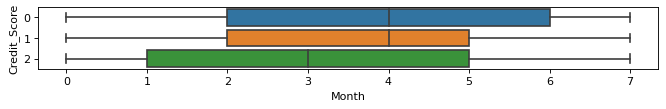

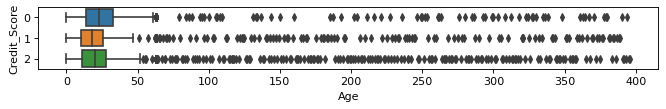

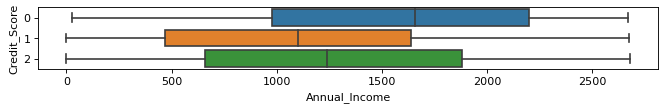

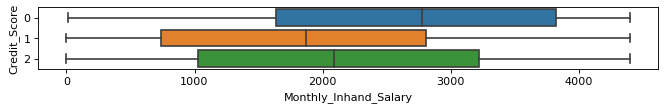

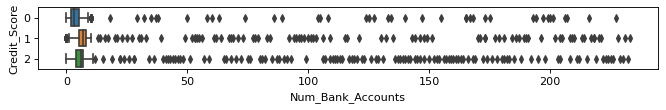

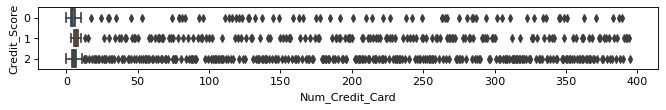

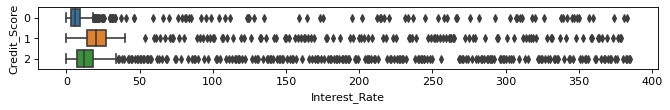

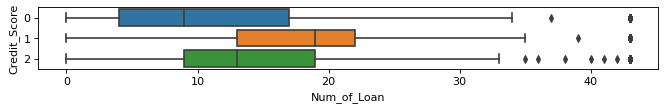

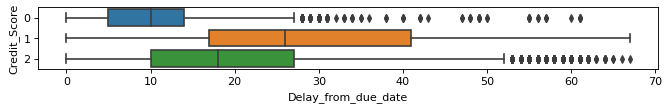

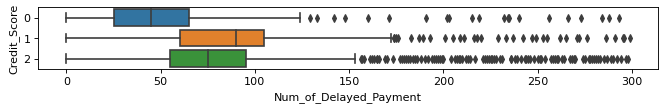

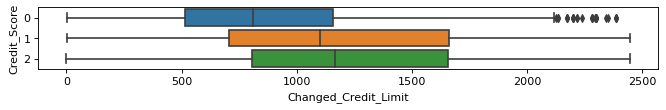

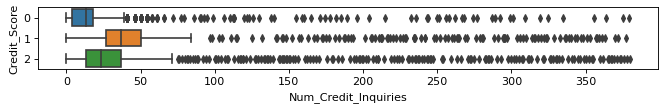

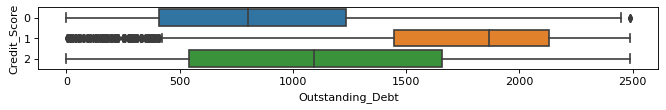

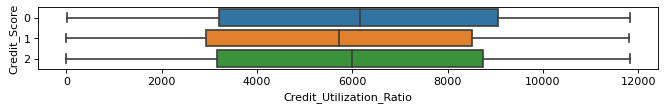

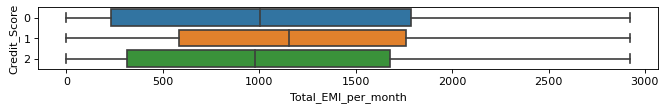

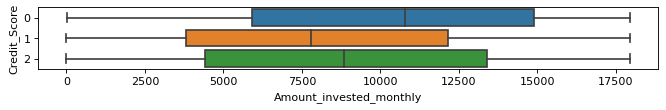

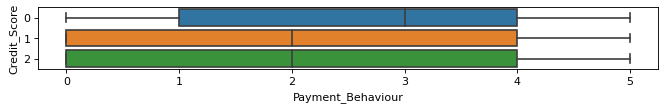

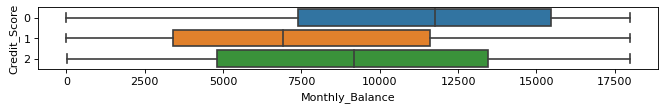

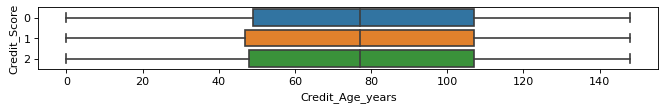

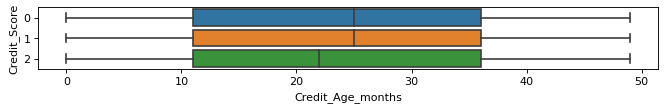

In [555]:
for i in range(0,len(numerical_data)):
    plt.figure(figsize=(10,1),dpi=80)
    sns.boxplot(x = train_df[numerical_data[i]], y=train_df['Credit_Score'], data = train_df,orient="h")
    plt.show()

In [556]:
from scipy import stats

# Applying chi-square test
for col in train_df.columns:
    contingency_table = pd.crosstab(train_df[col], train_df['Credit_Score'])
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    print(f"Chi-square test results for {col}:")
    print(f"Chi-square statistic: {chi2}")
    print(f"P-value: {p}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies table:\n{expected}\n")

Chi-square test results for Customer_ID:
Chi-square statistic: 24697.305804559
P-value: 0.0
Degrees of freedom: 4998
Expected frequencies table:
[[1.24939337 2.03413319 3.71647344]
 [1.42787813 2.32472365 4.24739822]
 [1.42787813 2.32472365 4.24739822]
 ...
 [1.42787813 2.32472365 4.24739822]
 [1.42787813 2.32472365 4.24739822]
 [1.42787813 2.32472365 4.24739822]]

Chi-square test results for Month:
Chi-square statistic: 24.200596218969118
P-value: 0.04332977978898099
Degrees of freedom: 14
Expected frequencies table:
[[ 416.04799137  677.36635212 1237.58565651]
 [ 416.22647614  677.65694257 1238.11658129]
 [ 414.2631437   674.46044756 1232.27640874]
 [ 409.9795093   667.48627662 1219.53421407]
 [ 413.01375034  672.42631437 1228.55993529]
 [ 412.6567808   671.84513346 1227.49808574]
 [ 415.33405231  676.20399029 1235.4619574 ]
 [ 412.47829604  671.554543   1226.96716096]]

Chi-square test results for Age:
Chi-square statistic: 1844.2062312323185
P-value: 1.1451487187390708e-85
Degrees 

Chi-square test results for Credit_Utilization_Ratio:
Chi-square statistic: 23703.49075858244
P-value: 0.39819452554478957
Degrees of freedom: 23648
Expected frequencies table:
[[0.17848477 0.29059046 0.53092478]
 [0.17848477 0.29059046 0.53092478]
 [0.17848477 0.29059046 0.53092478]
 ...
 [0.17848477 0.29059046 0.53092478]
 [0.17848477 0.29059046 0.53092478]
 [0.17848477 0.29059046 0.53092478]]

Chi-square test results for Payment_of_Min_Amount:
Chi-square statistic: 3546.23234447681
P-value: 0.0
Degrees of freedom: 4
Expected frequencies table:
[[ 398.91345376  649.46966837 1186.61687786]
 [1183.88945807 1927.48649232 3521.62404961]
 [1727.19708816 2812.04383931 5137.75907253]]

Chi-square test results for Total_EMI_per_month:
Chi-square statistic: 22894.98168767528
P-value: 0.0
Degrees of freedom: 5846
Expected frequencies table:
[[3.41619844e+02 5.56190132e+02 1.01619002e+03]
 [1.42787813e+00 2.32472365e+00 4.24739822e+00]
 [1.42787813e+00 2.32472365e+00 4.24739822e+00]
 ...
 [1.78

In [557]:
x = train_df.drop(['Credit_Score','Monthly_Balance','Amount_invested_monthly','Credit_Utilization_Ratio','Occupation','Month'],axis=1)
y = train_df['Credit_Score']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

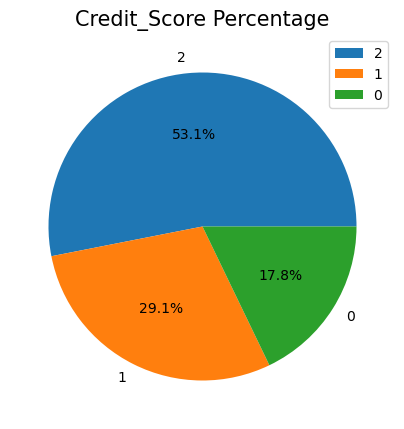

In [558]:
labels = train_df["Credit_Score"].value_counts().index
sizes = train_df["Credit_Score"].value_counts()

plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 15)
plt.legend(train_df["Credit_Score"].value_counts().index)
plt.show()

In [559]:
print(train_df["Credit_Score"].value_counts())

Credit_Score
2    9846
1    5389
0    3310
Name: count, dtype: int64


In [560]:
# Applying SMOTE

train_df_balanced = train_df.copy()
X = train_df_balanced.drop("Credit_Score", axis=1)
y = train_df_balanced["Credit_Score"]

In [561]:
max_class_samples = y.value_counts().max()

oversampled_data = []
for class_label, count in y.value_counts().items():
    oversampled_data.append(X[y == class_label].sample(max_class_samples, replace=True, random_state=42))

In [562]:
X_resampled = pd.concat(oversampled_data).reset_index(drop=True)
y_resampled = pd.Series(np.repeat(y.value_counts().index, max_class_samples))

In [563]:
train_df_balanced = pd.concat([X_resampled, y_resampled.reset_index(drop=True)], axis=1)

In [564]:
print(train_df_balanced["Credit_Score"].value_counts())

Credit_Score
2    9846
1    9846
0    9846
Name: count, dtype: int64


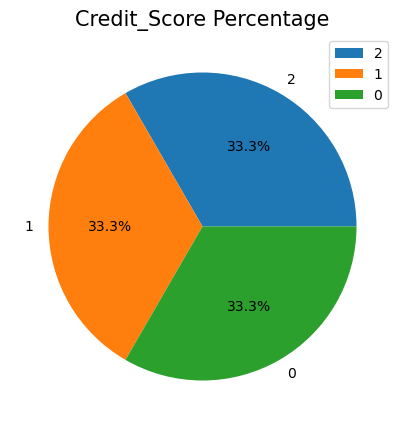

In [565]:
labels = train_df_balanced["Credit_Score"].value_counts().index
sizes = train_df_balanced["Credit_Score"].value_counts()

plt.figure(figsize = (5,5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Credit_Score Percentage',color = 'black',fontsize = 15)
plt.legend(train_df_balanced["Credit_Score"].value_counts().index)
plt.show()

In [566]:
train_df_balanced.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months,Credit_Score
0,1059,1,31,14,789,950,3,5,327,0,...,823,9432,2,0,6212,1,9258,102,46,2
1,1807,6,26,13,711,1261,0,4,7,4,...,1223,740,0,22,6318,3,9027,67,21,2
2,259,2,16,4,2222,3909,5,5,12,9,...,255,7700,2,1361,16583,3,14639,142,36,2
3,1582,1,14,11,1003,1874,1,5,5,9,...,526,8627,1,473,704,5,13197,146,36,2
4,1803,0,7,1,2288,3997,2,3,1,9,...,1591,8841,1,1537,7381,5,17491,87,49,2


In [567]:
X= train_df_balanced.drop(['Credit_Score'],axis=1)
Y=train_df_balanced['Credit_Score']

In [568]:
sc = StandardScaler()
X= sc.fit_transform(X)

In [569]:
# Preparing test data

In [570]:
test_df.head()

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,0x160a,CUS_0xd40,September,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,2022.0,Good,809.98,35.030402,22 Years and 9 Months,No,49.574949,236.64268203272135,Low_spent_Small_value_payments,186.266702
1,0x160b,CUS_0xd40,October,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.053114,22 Years and 10 Months,No,49.574949,21.465380264657146,High_spent_Medium_value_payments,361.444004
2,0x160c,CUS_0xd40,November,Aaron Maashoh,24,821-00-0265,Scientist,19114.12,1824.843333,3,...,4.0,Good,809.98,33.811894,NaN,No,49.574949,148.23393788500925,Low_spent_Medium_value_payments,264.675446
3,0x160d,CUS_0xd40,December,Aaron Maashoh,24_,821-00-0265,Scientist,19114.12,NaN,3,...,4.0,Good,809.98,32.430559,23 Years and 0 Months,No,49.574949,39.08251089460281,High_spent_Medium_value_payments,343.826873
4,0x1616,CUS_0x21b1,September,Rick Rothackerj,28,004-07-5839,_______,34847.84,3037.986667,2,...,5.0,Good,605.03,25.926822,27 Years and 3 Months,No,18.816215,39.684018417945296,High_spent_Large_value_payments,485.298434


In [571]:
test_df=test_df.drop(columns=["ID","Name","SSN"],axis=1)

In [572]:
custom_mapping = {
    "Low_spent_Small_value_payments": 1,
    "Low_spent_Medium_value_payments": 2,
    "Low_spent_Large_value_payments": 3,
    "High_spent_Small_value_payments": 4,
    "High_spent_Medium_value_payments": 5,
    "High_spent_Large_value_payments": 6}

le = LabelEncoder()
le.fit(test_df["Payment_Behaviour"]) 
test_df["Payment_Behaviour"] = test_df["Payment_Behaviour"].map(custom_mapping)

In [573]:
years  = []
months = []
for value in test_df["Credit_History_Age"]:
    if value is np.nan:
        years.append(np.nan)
        months.append(np.nan)
    else:
        new_str = value.lower().split()
        years_ = int(new_str[0])
        months_ = int(new_str[new_str.index('and')+1])
        years.append(years_)
        months.append(months_)
test_df['Credit_Age_years'] = pd.Series(years)
test_df['Credit_Age_months'] = pd.Series(months) 
test_df.drop('Credit_History_Age',axis=1,inplace=True)

In [574]:
test_df["Total_EMI_per_month"]=test_df["Total_EMI_per_month"].round(3)
test_df["Total_EMI_per_month"]=test_df["Total_EMI_per_month"].astype("float")
test_df["Credit_Utilization_Ratio"]=test_df["Credit_Utilization_Ratio"].round(3)
test_df["Type_of_Loan"]=test_df["Type_of_Loan"].astype("object")
test_df["Num_Bank_Accounts"]=test_df["Num_Bank_Accounts"].round().astype('Int64')
test_df["Monthly_Inhand_Salary"]=test_df["Monthly_Inhand_Salary"].round(3)

In [575]:
custom_mapping_credit = {"Standard":1,"Bad":2,"Good":3}

le2 = LabelEncoder()
le2.fit(test_df["Credit_Mix"]) 
test_df["Credit_Mix"] = test_df["Credit_Mix"].map(custom_mapping_credit)

In [576]:
custom_mapping_month={"September":9,"October":10,"November":11,"December":12}

le1 = LabelEncoder()
le1.fit(test_df["Month"]) 
test_df["Month"] = test_df["Month"].map(custom_mapping_month)

In [577]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               10000 non-null  object 
 1   Month                     10000 non-null  int64  
 2   Age                       10000 non-null  object 
 3   Occupation                10000 non-null  object 
 4   Annual_Income             10000 non-null  object 
 5   Monthly_Inhand_Salary     8505 non-null   float64
 6   Num_Bank_Accounts         10000 non-null  Int64  
 7   Num_Credit_Card           10000 non-null  int64  
 8   Interest_Rate             10000 non-null  int64  
 9   Num_of_Loan               10000 non-null  object 
 10  Type_of_Loan              8892 non-null   object 
 11  Delay_from_due_date       10000 non-null  int64  
 12  Num_of_Delayed_Payment    9312 non-null   object 
 13  Changed_Credit_Limit      10000 non-null  object 
 14  Num_Cre

In [578]:
test_df = test_df.apply(lambda x: x.astype('category').cat.codes)
test_df.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months
0,2453,0,47,12,992,765,3,4,2,32,...,2,2360,5085,1,697,3670,0,570,22,9
1,2453,1,50,12,992,765,3,4,2,32,...,2,2360,4199,1,697,3208,4,5574,22,10
2,2453,2,50,12,992,765,3,4,2,32,...,2,2360,4545,1,697,1765,1,2177,-1,-1
3,2453,3,53,12,992,-1,3,4,2,32,...,2,2360,3925,1,697,5329,4,5090,23,0
4,190,0,66,15,1759,1251,2,4,5,3,...,2,2111,1060,1,139,5348,5,7491,27,3


In [579]:
test_df.shape

(10000, 25)

In [580]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.3,random_state=42)

# Model Training

In [581]:
train_df_balanced.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months,Credit_Score
0,1059,1,31,14,789,950,3,5,327,0,...,823,9432,2,0,6212,1,9258,102,46,2
1,1807,6,26,13,711,1261,0,4,7,4,...,1223,740,0,22,6318,3,9027,67,21,2
2,259,2,16,4,2222,3909,5,5,12,9,...,255,7700,2,1361,16583,3,14639,142,36,2
3,1582,1,14,11,1003,1874,1,5,5,9,...,526,8627,1,473,704,5,13197,146,36,2
4,1803,0,7,1,2288,3997,2,3,1,9,...,1591,8841,1,1537,7381,5,17491,87,49,2


In [582]:
X = train_df_balanced.drop(['Credit_Score'],axis=1)
Y = train_df_balanced['Credit_Score']

In [583]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.3,random_state=42)

## Random Forest

In [584]:
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)  
random_forest.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [585]:
random_forest.score(x_train, y_train)

1.0

In [586]:
random_forest.score(x_test,y_test)

0.8747400493301736

In [587]:
Y_pred=random_forest.predict(x_test)
Y_pred

array([1, 0, 0, ..., 1, 1, 1], dtype=int8)

In [588]:
random_forest_df = pd.DataFrame({"y_predict":Y_pred,"y_test":y_test})
random_forest_df.head()

,y_predict,y_test
16143,1,1
27867,0,0
24219,0,0
15113,1,1
3383,2,2


In [589]:
report = classification_report(y_test, Y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      6840
           1       0.88      0.90      0.89      6910
           2       0.88      0.77      0.82      6927

    accuracy                           0.87     20677
   macro avg       0.87      0.88      0.87     20677
weighted avg       0.87      0.87      0.87     20677



In [590]:
pred = random_forest.predict(test_df)
pred

array([1, 2, 2, ..., 2, 2, 2], dtype=int8)

In [391]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(x_train, y_train)

print("Best Parameters for Random Forest:", grid_search_rf.best_params_)
print("Best Accuracy for Random Forest:", grid_search_rf.best_score_)

best_rf_model = grid_search_rf.best_estimator_
test_accuracy_rf = best_rf_model.score(x_test, y_test)
print("Test Accuracy for Random Forest with Best Parameters:", test_accuracy_rf)

Best Parameters for Random Forest: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Accuracy for Random Forest: 0.8738766980146291
Test Accuracy for Random Forest with Best Parameters: 0.872423945044161


## Naive Bayes

In [591]:
from sklearn.naive_bayes import GaussianNB

In [592]:
naive_bayes = GaussianNB()
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [593]:
nb_train_score = naive_bayes.score(x_train, y_train)
nb_test_score = naive_bayes.score(x_test, y_test)

In [594]:
print(f"Naive Bayes Train Accuracy: {nb_train_score:.4f}")
print(f"Naive Bayes Test Accuracy: {nb_test_score:.4f}")

Naive Bayes Train Accuracy: 0.6496
Naive Bayes Test Accuracy: 0.6543


In [595]:
nb_y_pred = naive_bayes.predict(x_test)
nb_y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [596]:
nb_report = classification_report(y_test, nb_y_pred)
print("Naive Bayes Classification Report:\n", nb_report)

Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.83      0.73      6840
           1       0.68      0.65      0.67      6910
           2       0.63      0.49      0.55      6927

    accuracy                           0.65     20677
   macro avg       0.65      0.66      0.65     20677
weighted avg       0.65      0.65      0.65     20677



In [398]:
naive_bayes = GaussianNB()

param_grid_nb = {'priors': [None, [0.1, 0.9], [0.2, 0.8], [0.3, 0.7], [0.4, 0.6], [0.5, 0.5]]}

grid_search_nb = GridSearchCV(naive_bayes, param_grid=param_grid_nb, cv=5, scoring='accuracy')
grid_search_nb.fit(x_train, y_train)

print("Best Parameters for Naive Bayes:", grid_search_nb.best_params_)
print("Best Accuracy for Naive Bayes:", grid_search_nb.best_score_)

best_nb_model = grid_search_nb.best_estimator_
test_accuracy_nb = best_nb_model.score(x_test, y_test)
print("Test Accuracy for Naive Bayes with Best Parameters:", test_accuracy_nb)

nb_y_pred = best_nb_model.predict(x_test)
nb_report = classification_report(y_test, nb_y_pred)
print("Naive Bayes Classification Report:\n", nb_report)

Best Parameters for Naive Bayes: {'priors': None}
Best Accuracy for Naive Bayes: 0.7522204806687565
Test Accuracy for Naive Bayes with Best Parameters: 0.6997055937193327
Naive Bayes Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.82      0.77       328
           1       0.75      0.78      0.76       337
           2       0.61      0.51      0.56       354

    accuracy                           0.70      1019
   macro avg       0.69      0.70      0.70      1019
weighted avg       0.69      0.70      0.69      1019



## Decision Tree Classifier

In [597]:
from sklearn.tree import DecisionTreeClassifier

In [598]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [599]:
dt_train_score = decision_tree.score(x_train, y_train)
dt_test_score = decision_tree.score(x_test, y_test)

In [600]:
print(f"Decision Tree Train Accuracy: {dt_train_score:.4f}")
print(f"Decision Tree Test Accuracy: {dt_test_score:.4f}")

Decision Tree Train Accuracy: 1.0000
Decision Tree Test Accuracy: 0.8171


In [601]:
dt_y_pred = decision_tree.predict(x_test)
dt_y_pred

array([1, 0, 0, ..., 2, 1, 1], dtype=int8)

In [602]:
dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classification Report:\n", dt_report)

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      6840
           1       0.83      0.83      0.83      6910
           2       0.77      0.73      0.75      6927

    accuracy                           0.82     20677
   macro avg       0.82      0.82      0.82     20677
weighted avg       0.82      0.82      0.82     20677



In [405]:
decision_tree = DecisionTreeClassifier(random_state=42)

param_grid_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search_dt = GridSearchCV(decision_tree, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(x_train, y_train)

print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)
print("Best Accuracy for Decision Tree:", grid_search_dt.best_score_)

best_dt_model = grid_search_dt.best_estimator_
test_accuracy_dt = best_dt_model.score(x_test, y_test)
print("Test Accuracy for Decision Tree with Best Parameters:", test_accuracy_dt)

dt_y_pred = best_dt_model.predict(x_test)
dt_report = classification_report(y_test, dt_y_pred)
print("Decision Tree Classification Report:\n", dt_report)

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}
Best Accuracy for Decision Tree: 0.8096917450365726
Test Accuracy for Decision Tree with Best Parameters: 0.8076545632973503
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.88      0.83       328
           1       0.87      0.85      0.86       337
           2       0.76      0.70      0.73       354

    accuracy                           0.81      1019
   macro avg       0.81      0.81      0.81      1019
weighted avg       0.81      0.81      0.81      1019



## Gradient Boosting Classifier

In [603]:
from sklearn.ensemble import GradientBoostingClassifier

In [604]:
gradient_boosting = GradientBoostingClassifier(random_state=42)
gradient_boosting.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [605]:
gb_train_score = gradient_boosting.score(x_train, y_train)
gb_test_score = gradient_boosting.score(x_test, y_test)

In [606]:
print(f"Gradient Boosting Train Accuracy: {gb_train_score:.4f}")
print(f"Gradient Boosting Test Accuracy: {gb_test_score:.4f}")

Gradient Boosting Train Accuracy: 0.7723
Gradient Boosting Test Accuracy: 0.7501


In [607]:
gb_y_pred = gradient_boosting.predict(x_test)
gb_y_pred

array([0, 0, 0, ..., 1, 0, 1], dtype=int8)

In [608]:
gb_report = classification_report(y_test, gb_y_pred)
print("Gradient Boosting Classification Report:\n", gb_report)


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.88      0.80      6840
           1       0.78      0.77      0.77      6910
           2       0.75      0.60      0.67      6927

    accuracy                           0.75     20677
   macro avg       0.75      0.75      0.75     20677
weighted avg       0.75      0.75      0.75     20677



In [413]:
gradient_boosting = GradientBoostingClassifier(random_state=42)

param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2']}

grid_search_gb = GridSearchCV(gradient_boosting, param_grid=param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(x_train, y_train)

print("Best Parameters for Gradient Boosting:", grid_search_gb.best_params_)
print("Best Accuracy for Gradient Boosting:", grid_search_gb.best_score_)

best_gb_model = grid_search_gb.best_estimator_
test_accuracy_gb = best_gb_model.score(x_test, y_test)
print("Test Accuracy for Gradient Boosting with Best Parameters:", test_accuracy_gb)

gb_y_pred = best_gb_model.predict(x_test)
gb_report = classification_report(y_test, gb_y_pred)
print("Gradient Boosting Classification Report:\n", gb_report)

Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}
Best Accuracy for Gradient Boosting: 0.8692528735632183
Test Accuracy for Gradient Boosting with Best Parameters: 0.8832188420019627
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       328
           1       0.90      0.92      0.91       337
           2       0.90      0.77      0.83       354

    accuracy                           0.88      1019
   macro avg       0.88      0.89      0.88      1019
weighted avg       0.88      0.88      0.88      1019



## Ada Boost Classifier

In [609]:
from sklearn.ensemble import AdaBoostClassifier

In [610]:
ada_boost = AdaBoostClassifier(random_state=42)
ada_boost.fit(x_train, y_train)

AdaBoostClassifier(random_state=42)

In [611]:
ada_train_score = ada_boost.score(x_train, y_train)
ada_test_score = ada_boost.score(x_test, y_test)

In [612]:
print(f"Ada Boost Train Accuracy: {ada_train_score:.4f}")
print(f"Ada Boost Test Accuracy: {ada_test_score:.4f}")

Ada Boost Train Accuracy: 0.6722
Ada Boost Test Accuracy: 0.6732


In [613]:
ada_y_pred = ada_boost.predict(x_test)
ada_y_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int8)

In [614]:
ada_report = classification_report(y_test, ada_y_pred)
print("Ada Boost Classification Report:\n", ada_report)

Ada Boost Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.81      0.74      6840
           1       0.71      0.65      0.68      6910
           2       0.62      0.56      0.59      6927

    accuracy                           0.67     20677
   macro avg       0.67      0.67      0.67     20677
weighted avg       0.67      0.67      0.67     20677



In [420]:
ada_boost = AdaBoostClassifier(random_state=42)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']}

grid_search_ada = GridSearchCV(ada_boost, param_grid=param_grid_ada, cv=5, scoring='accuracy')
grid_search_ada.fit(x_train, y_train)

print("Best Parameters for AdaBoost:", grid_search_ada.best_params_)
print("Best Accuracy for AdaBoost:", grid_search_ada.best_score_)

best_ada_model = grid_search_ada.best_estimator_
test_accuracy_ada = best_ada_model.score(x_test, y_test)
print("Test Accuracy for AdaBoost with Best Parameters:", test_accuracy_ada)

ada_y_pred = best_ada_model.predict(x_test)
ada_report = classification_report(y_test, ada_y_pred)
print("AdaBoost Classification Report:\n", ada_report)

Best Parameters for AdaBoost: {'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}
Best Accuracy for AdaBoost: 0.7820532915360501
Test Accuracy for AdaBoost with Best Parameters: 0.7595682041216879
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83       328
           1       0.80      0.81      0.80       337
           2       0.67      0.62      0.64       354

    accuracy                           0.76      1019
   macro avg       0.76      0.76      0.76      1019
weighted avg       0.76      0.76      0.76      1019



## XgBoost

In [615]:
from xgboost import XGBClassifier

In [616]:
model = xgb.XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

In [617]:
model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, num_class=3,
              num_parallel_tree=None, ...)

In [618]:
y_pred = model.predict(x_test)

In [619]:
accuracy = accuracy_score(y_test, Y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.87


In [620]:
recall = recall_score(y_test, Y_pred, average='macro')  
print(f"Recall: {recall:.2f}")

Recall: 0.88


In [621]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      6840
           1       0.87      0.90      0.89      6910
           2       0.87      0.76      0.81      6927

    accuracy                           0.87     20677
   macro avg       0.87      0.87      0.87     20677
weighted avg       0.87      0.87      0.87     20677



In [622]:
Y_pred=model.predict(test_df)
Y_pred

array([1, 1, 0, ..., 2, 2, 2], dtype=int32)

In [623]:
(Y_pred[Y_pred>0.49].shape[0]/Y_pred.shape[0])*100

89.69

In [431]:
model = XGBClassifier(objective='multi:softmax', num_class=3, random_state=42)

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5],
    'min_child_weight': [1, 3],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'gamma': [0, 0.1]}

grid_search_xgb = GridSearchCV(model, param_grid=param_grid_xgb, cv=5, scoring='accuracy')
grid_search_xgb.fit(x_train, y_train)

print("Best Parameters for XGBoost:", grid_search_xgb.best_params_)
print("Best Accuracy for XGBoost:", grid_search_xgb.best_score_)

best_xgb_model = grid_search_xgb.best_estimator_
y_pred = best_xgb_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

recall = recall_score(y_test, y_pred, average='macro')  
print(f"Recall: {recall:.2f}")

report = classification_report(y_test, y_pred)
print("XGBoost Classification Report:\n", report)

y_pred_test = best_xgb_model.predict(test_df)
y_pred_test

Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}
Best Accuracy for XGBoost: 0.8669278996865204
Accuracy: 0.87
Recall: 0.87
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91       328
           1       0.87      0.92      0.90       337
           2       0.87      0.75      0.80       354

    accuracy                           0.87      1019
   macro avg       0.87      0.87      0.87      1019
weighted avg       0.87      0.87      0.87      1019



array([2, 0, 0, 1, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 0, 0,
       2, 0, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1,
       2, 2, 0, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2,
       0, 2, 0, 0, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 0, 2, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2,

## Neural Network

In [624]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [625]:
train_df_balanced.head()

,Customer_ID,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Age_years,Credit_Age_months,Credit_Score
0,1059,1,31,14,789,950,3,5,327,0,...,823,9432,2,0,6212,1,9258,102,46,2
1,1807,6,26,13,711,1261,0,4,7,4,...,1223,740,0,22,6318,3,9027,67,21,2
2,259,2,16,4,2222,3909,5,5,12,9,...,255,7700,2,1361,16583,3,14639,142,36,2
3,1582,1,14,11,1003,1874,1,5,5,9,...,526,8627,1,473,704,5,13197,146,36,2
4,1803,0,7,1,2288,3997,2,3,1,9,...,1591,8841,1,1537,7381,5,17491,87,49,2


In [626]:
X = train_df_balanced.drop(['Credit_Score'],axis=1)
Y = train_df_balanced['Credit_Score']

x_train,x_test,y_train,y_test = train_test_split(X,Y,train_size=0.3,random_state=42)

In [627]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [628]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [629]:
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
Y_tensor = torch.tensor(y_train.values, dtype=torch.long)

In [630]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_rate=0.5):
        super(NeuralNetwork, self).__init__()

        self.hidden_layers = nn.ModuleList([
            nn.Sequential(
                nn.Linear(input_size, hidden_sizes[0]),
                nn.ReLU(),
                nn.Dropout(p=dropout_rate)
            )
        ])

        for i in range(1, len(hidden_sizes)):
            self.hidden_layers.extend([
                nn.Sequential(
                    nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]),
                    nn.ReLU(),
                    nn.Dropout(p=dropout_rate)
                )
            ])

        self.output_layer = nn.Linear(hidden_sizes[-1], output_size)

    def forward(self, x):
        for hidden_layer in self.hidden_layers:
            x = hidden_layer(x)

        x = self.output_layer(x)

        return x

In [631]:
input_size = X.shape[1]
hidden_sizes = [128, 128, 128,128]  
output_size = len(Y.unique())

In [632]:
model = NeuralNetwork(input_size, hidden_sizes, output_size)

In [633]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [634]:
epochs = 50
for epoch in range(epochs):
    outputs = model(X_tensor)
    loss = criterion(outputs, Y_tensor)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

Epoch [1/50], Loss: 1.1087086200714111
Epoch [11/50], Loss: 1.063392996788025
Epoch [21/50], Loss: 0.9202582836151123
Epoch [31/50], Loss: 0.8767446875572205
Epoch [41/50], Loss: 0.849941074848175


In [635]:
model.eval()

NeuralNetwork(
  (hidden_layers): ModuleList(
    (0): Sequential(
      (0): Linear(in_features=25, out_features=128, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
    )
    (1-3): 3 x Sequential(
      (0): Linear(in_features=128, out_features=128, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.5, inplace=False)
    )
  )
  (output_layer): Linear(in_features=128, out_features=3, bias=True)
)

In [636]:
with torch.no_grad():
    x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)
    test_predictions = model(x_test_tensor)

In [637]:
test_predictions = test_predictions.numpy()
predicted_class = np.argmax(test_predictions, axis=1)

In [638]:
accuracy = accuracy_score(y_test.values, predicted_class)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6850606954587223


In [639]:
print('Classification Report:\n', classification_report(y_test.values, predicted_class))

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.85      0.75      6840
           1       0.69      0.72      0.71      6910
           2       0.70      0.49      0.58      6927

    accuracy                           0.69     20677
   macro avg       0.69      0.69      0.68     20677
weighted avg       0.69      0.69      0.68     20677



In [640]:
print('Confusion Matrix:\n', confusion_matrix(y_test.values, predicted_class))

Confusion Matrix:
 [[5800  250  790]
 [1275 4979  656]
 [1579 1962 3386]]


In [449]:
# Hyperparameter Tuning
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [450]:
def create_model(input_size, hidden_sizes, output_size, dropout_rate=0.5):
    model = nn.Sequential()
    model.add_module('input', nn.Linear(input_size, hidden_sizes[0]))
    model.add_module('relu_0', nn.ReLU())
    model.add_module('dropout_0', nn.Dropout(p=dropout_rate))

    for i in range(1, len(hidden_sizes)):
        model.add_module(f'hidden_{i}', nn.Linear(hidden_sizes[i - 1], hidden_sizes[i]))
        model.add_module(f'relu_{i}', nn.ReLU())
        model.add_module(f'dropout_{i}', nn.Dropout(p=dropout_rate))

    model.add_module('output', nn.Linear(hidden_sizes[-1], output_size))

    return model

In [451]:
def train_model(model, train_loader, criterion, optimizer, epochs=50):
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        if epoch % 10 == 0:
            print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item()}')

In [452]:
def evaluate_model(model, test_loader, y_test):
    model.eval()
    with torch.no_grad():
        test_predictions = model(test_loader)
        predicted_class = torch.argmax(test_predictions, dim=1).numpy()

    accuracy = accuracy_score(y_test, predicted_class)
    print(f'Accuracy: {accuracy}')
    print('Classification Report:\n', classification_report(y_test, predicted_class))
    print('Confusion Matrix:\n', confusion_matrix(y_test, predicted_class))

In [453]:
param_grid_nn = {
    'hidden_sizes': [[128, 128, 128], [64, 64, 64], [256, 256, 256]],
    'dropout_rate': [0.2, 0.5, 0.7],
    'lr': [0.001, 0.01, 0.1]}

In [454]:
input_size = X.shape[1]
output_size = len(Y.unique())

X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
Y_tensor = torch.tensor(y_train.values, dtype=torch.long)

dataset = TensorDataset(X_tensor, Y_tensor)
train_loader = DataLoader(dataset, batch_size=32, shuffle=True)

best_accuracy = 0
best_params = None

In [455]:
for hidden_sizes in param_grid_nn['hidden_sizes']:
    for dropout_rate in param_grid_nn['dropout_rate']:
        for lr in param_grid_nn['lr']:
            model = create_model(input_size, hidden_sizes, output_size, dropout_rate=dropout_rate)
            optimizer = optim.Adam(model.parameters(), lr=lr)
            criterion = nn.CrossEntropyLoss()

            train_model(model, train_loader, criterion, optimizer)

            x_test_tensor = torch.tensor(x_test_scaled, dtype=torch.float32)

            model.eval()
            with torch.no_grad():
                test_predictions = model(x_test_tensor)
                predicted_class = torch.argmax(test_predictions, dim=1).numpy()

            accuracy = accuracy_score(y_test.values, predicted_class)
            print(f'Hidden Sizes: {hidden_sizes}, Dropout Rate: {dropout_rate}, Learning Rate: {lr}, Accuracy: {accuracy}')

            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_params = {'hidden_sizes': hidden_sizes, 'dropout_rate': dropout_rate, 'lr': lr}

Epoch [1/50], Loss: 0.9317806959152222
Epoch [11/50], Loss: 0.4031772017478943
Epoch [21/50], Loss: 0.2662431001663208
Epoch [31/50], Loss: 0.3781174421310425
Epoch [41/50], Loss: 0.08431757241487503
Hidden Sizes: [128, 128, 128], Dropout Rate: 0.2, Learning Rate: 0.001, Accuracy: 0.8518155053974484
Epoch [1/50], Loss: 0.48157721757888794
Epoch [11/50], Loss: 0.19049997627735138
Epoch [21/50], Loss: 0.036098409444093704
Epoch [31/50], Loss: 0.11012961715459824
Epoch [41/50], Loss: 0.04647602513432503
Hidden Sizes: [128, 128, 128], Dropout Rate: 0.2, Learning Rate: 0.01, Accuracy: 0.8233562315996075
Epoch [1/50], Loss: 0.6574563980102539
Epoch [11/50], Loss: 1.0124714374542236
Epoch [21/50], Loss: 1.1075280904769897
Epoch [31/50], Loss: 1.0922960042953491
Epoch [41/50], Loss: 1.0959811210632324
Hidden Sizes: [128, 128, 128], Dropout Rate: 0.2, Learning Rate: 0.1, Accuracy: 0.32188420019627084
Epoch [1/50], Loss: 1.0278162956237793
Epoch [11/50], Loss: 0.5626639723777771
Epoch [21/50], L

In [456]:
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'hidden_sizes': [128, 128, 128], 'dropout_rate': 0.2, 'lr': 0.001}


In [457]:
final_model = create_model(input_size, best_params['hidden_sizes'], output_size, dropout_rate=best_params['dropout_rate'])
final_optimizer = optim.Adam(final_model.parameters(), lr=best_params['lr'])
final_criterion = nn.CrossEntropyLoss()

train_model(final_model, train_loader, final_criterion, final_optimizer)
evaluate_model(final_model, x_test_tensor, y_test.values)

Epoch [1/50], Loss: 0.9226621389389038
Epoch [11/50], Loss: 0.3504028916358948
Epoch [21/50], Loss: 0.11209256947040558
Epoch [31/50], Loss: 0.14746323227882385
Epoch [41/50], Loss: 0.19400785863399506
Accuracy: 0.844946025515211
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.91      0.89       328
           1       0.87      0.86      0.87       337
           2       0.79      0.77      0.78       354

    accuracy                           0.84      1019
   macro avg       0.85      0.85      0.85      1019
weighted avg       0.84      0.84      0.84      1019

Confusion Matrix:
 [[298   5  25]
 [  0 291  46]
 [ 43  39 272]]


In [1]:
import pandas as pd

data = {
    'Model': ['Random Forest Classifier', 'Naive Bayes', 'Decision Tree Classifier', 'Gradient Boosting Classifier', 'Ada Boost Classifier', 'XGBoost Classifier', 'Neural Network Classifier'],
    'Training Accuracy': [1.0, 0.6496, 1.0, 0.7723, 0.6722, 0.87, 0.6851],
    'Test Accuracy': [0.8747, 0.6543, 0.8171, 0.7501, 0.6732, 0.87, 0.6851],
    'Test Accuracy (After Tuning)': [0.8724, 0.6997, 0.8077, 0.8832, None, None, 0.8518],
    'Best Parameters': [
        "{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}",
        "{'priors': None}",
        "{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'random'}",
        "{'learning_rate': 0.1, 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50, 'subsample': 0.8}",
        "{'algorithm': 'SAMME', 'learning_rate': 1.0, 'n_estimators': 100}",
        "{'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 1.0}",
        "{'hidden_sizes': [128, 128, 128], 'dropout_rate': 0.2, 'lr': 0.001}"
    ]
}

df = pd.DataFrame(data)
df

,Model,Training Accuracy,Test Accuracy,Test Accuracy (After Tuning),Best Parameters
0,Random Forest Classifier,1.0000,0.8747,0.8724,"{'max_depth': 10, 'min_samples_leaf': 1, 'min_..."
1,Naive Bayes,0.6496,0.6543,0.6997,{'priors': None}
2,Decision Tree Classifier,1.0000,0.8171,0.8077,"{'criterion': 'gini', 'max_depth': None, 'min_..."
3,Gradient Boosting Classifier,0.7723,0.7501,0.8832,"{'learning_rate': 0.1, 'max_depth': 5, 'max_fe..."
4,Ada Boost Classifier,0.6722,0.6732,NaN,"{'algorithm': 'SAMME', 'learning_rate': 1.0, '..."
5,XGBoost Classifier,0.8700,0.8700,NaN,"{'colsample_bytree': 0.8, 'gamma': 0.1, 'learn..."
6,Neural Network Classifier,0.6851,0.6851,0.8518,"{'hidden_sizes': [128, 128, 128], 'dropout_rat..."
